<a href="https://colab.research.google.com/github/samersonal/Amazon-Reviews-Sentiment-Analysis/blob/main/Sentiment_Analysis_on_Amazon_Reviews_using_Vader_and_ROBERTa_by_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') #styling the plots

import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saptarshimondal/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saptarshimondal/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/saptarshimondal/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     /Users/saptarshimondal/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/saptarshimondal/nltk_data...


True

In [ ]:
#Read the data
df = pd.read_csv('Reviews.csv')

In [ ]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df['Text'].values[1] # Checking out few of the text.

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [ ]:
df.shape #A large dataset

(568454, 10)

In [ ]:
## EDA
df['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

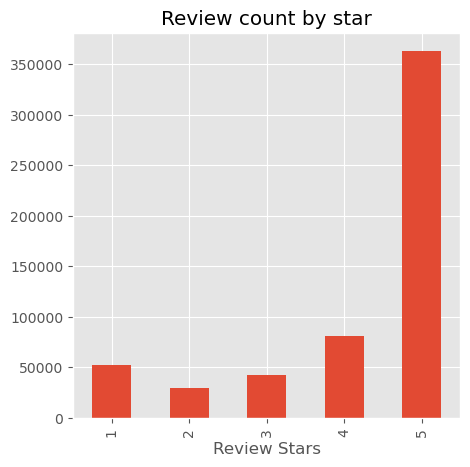

In [ ]:
ax = df['Score'].value_counts().sort_index()\
       .plot(kind = 'bar',
             title = 'Review count by star',
             figsize = (5,5))

ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
#Basic NLTK
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [ ]:
tokens = nltk.word_tokenize(example) # Smartly splits the sentence in words, not just by space or seperator
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint() # for pretty print

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!') # get the scores

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
#Running the polarity score on the entire dataset.
res = {}
for i, row in tqdm(df.iterrows(), total= len(df)):
  text  = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders.head(5)

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [ ]:
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df, how = 'left')
vaders.head(5) # We have sentiment score and metadata

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


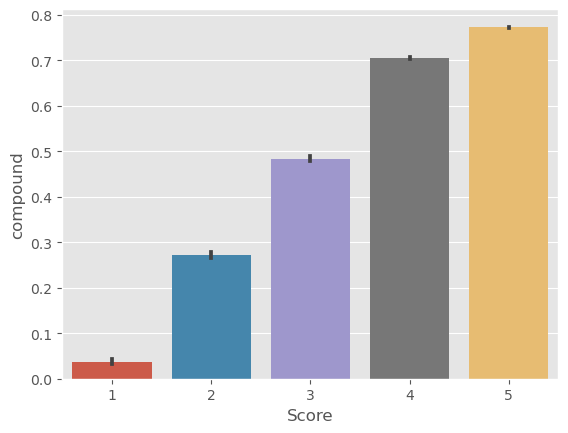

In [ ]:
#Plot VADER results
sns.barplot(data = vaders, x='Score', y = 'compound' )
plt.show()

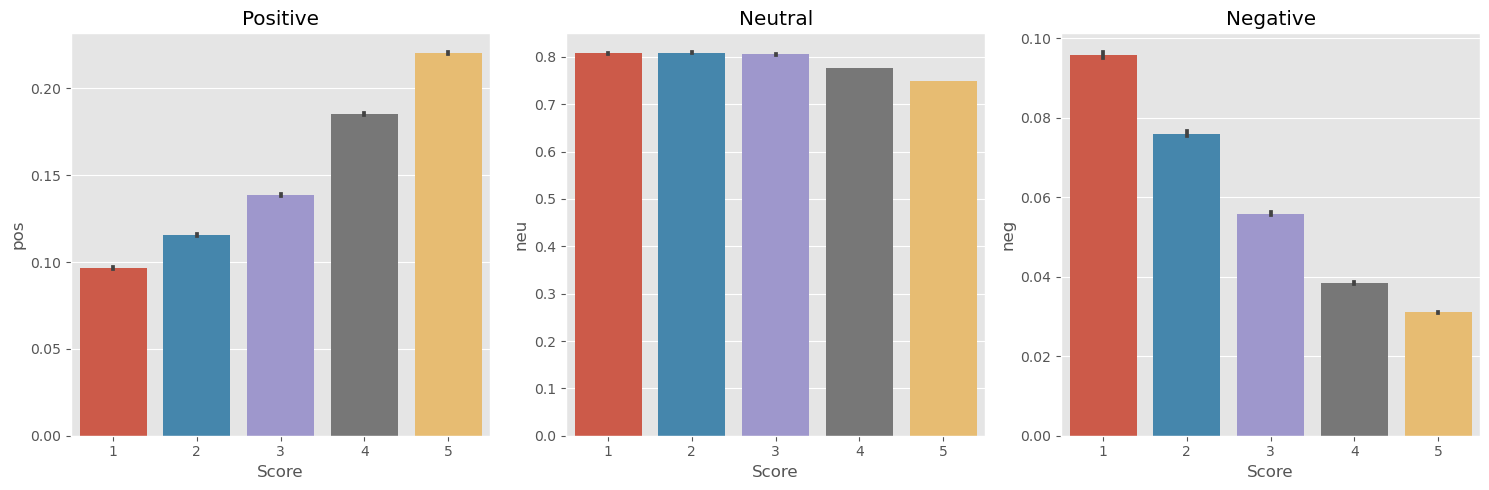

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15,5)) #subplots to compare side by side
sns.barplot(data = vaders, x = 'Score', y = 'pos', ax = axes[0])
sns.barplot(data = vaders, x = 'Score', y = 'neu', ax = axes[1])
sns.barplot(data = vaders, x = 'Score', y = 'neg', ax =axes[2])
axes[0].set_title('Positive')
axes[1].set_title('Neutral')
axes[2].set_title('Negative')
plt.tight_layout() #In case y axis overlaps

In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" #Pretrained model
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL) #Transfer learning , use the same training weights

In [ ]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
tokenizer(example, return_tensors='pt')

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
# run for RoBERTa model

#We need to encoding the text
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt') # pt for pytorch
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy() #Covert it from the tensor to numpy

    scores = softmax(scores) # Apply softmax function to output

    score_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2],
    }
    return score_dict

In [ ]:
#This are ran on a GPU not on a CPU.
res = {}
for i, row in tqdm(df.iterrows(), total= len(df)):
    try:
      text  = row['Text']
      myid = row['Id']
      vader_result = sia.polarity_scores(text)
      vader_result_rename = {}
      for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
      roberta_result = polarity_scores_roberta(text)
      both = {**vader_result_rename,**roberta_result}
      res[myid] = both
    except RuntimeError:
        print(f'Broke for this id {myid}')
    break

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
both

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441,
 'roberta_neg': 0.009624218,
 'roberta_neu': 0.049980335,
 'roberta_pos': 0.9403955}